# (14) 4강-2. 시리즈

- pandas의 기본 구조 요소, Numpy 배열과 무척 유사함
- 인덱스로 구성된 정보 배열을 담고 있음
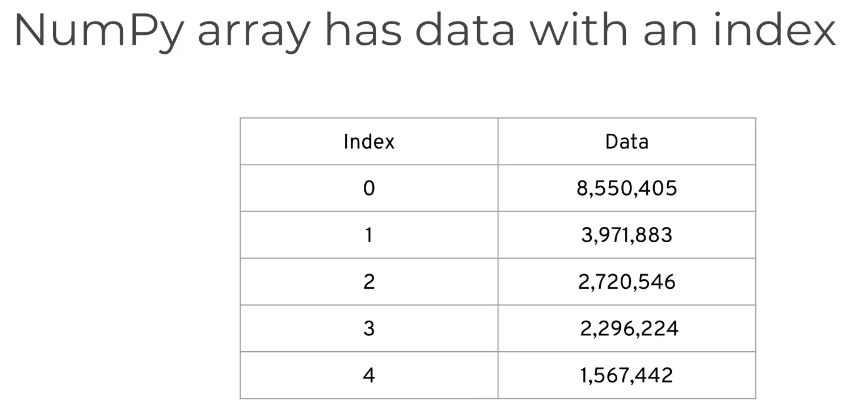

- Numpy가 요소별 브로드캐스팅 연산 능력을 추가로 갖고 있다는 점에서 다름
- 실제 데이터를 다룰 경우 직접 인터프리트할 수 있는 인덱스로 구성하고 싶을 때가 있어 Pandas 시리즈가 도입됨
- Numpy 배열과 Pandas 시리즈를 구분 짓는 요인은 `시리즈가 네임드 인덱스를 가지고 있어서` 0,1,2,3 등 숫자 인덱스에 기초한 정보를 기억하고 불러온다는 점. 네임드 인덱스로 데이터를 직접 불러올 수 있음 

## Pandas 라이브러리 import

In [1]:
import numpy as np
import pandas as pd

In [2]:
labels = ['a','b','c']
mylist = [10,20,30]
arr = np.array(mylist)
arr

array([10, 20, 30])

In [3]:
d = {'a':10, 'b':20, 'c':30}
d

{'a': 10, 'b': 20, 'c': 30}

### Pandas 생성

In [4]:
pd.Series(data=mylist)

0    10
1    20
2    30
dtype: int64

In [6]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [7]:
pd.Series(data=arr, index=labels)

a    10
b    20
c    30
dtype: int32

In [8]:
pd.Series(data=[10,'a','4.4'])

0     10
1      a
2    4.4
dtype: object

In [9]:
pd.Series(data=['d','a','e'])

0    d
1    a
2    e
dtype: object

In [10]:
ser1 = pd.Series([1,2,3,4], index=['USA','Germany','USSR','Japan'])
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [11]:
ser1['USA']

1

In [14]:
ser2 = pd.Series([1,4,5,6], index=['USA','Germany','Italy','Japan'])
ser2

USA        1
Germany    4
Italy      5
Japan      6
dtype: int64

In [15]:
ser1 + ser2

Germany     6.0
Italy       NaN
Japan      10.0
USA         2.0
USSR        NaN
dtype: float64

# (14) 4강-3. 데이터프레임 - Part 1

In [16]:
from numpy.random import randn
np.random.seed(101)

rand_mat = randn(5,4)
rand_mat

array([[ 2.70684984,  0.62813271,  0.90796945,  0.50382575],
       [ 0.65111795, -0.31931804, -0.84807698,  0.60596535],
       [-2.01816824,  0.74012206,  0.52881349, -0.58900053],
       [ 0.18869531, -0.75887206, -0.93323722,  0.95505651],
       [ 0.19079432,  1.97875732,  2.60596728,  0.68350889]])

In [18]:
df = pd.DataFrame(data = rand_mat)
df

,0,1,2,3
0,2.706850,0.628133,0.907969,0.503826
1,0.651118,-0.319318,-0.848077,0.605965
2,-2.018168,0.740122,0.528813,-0.589001
3,0.188695,-0.758872,-0.933237,0.955057
4,0.190794,1.978757,2.605967,0.683509


In [20]:
df = pd.DataFrame(data = rand_mat, index='A B C D E'.split(), columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### 데이터프레임 selection

In [21]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [22]:
type(df['W'])

pandas.core.series.Series

In [23]:
my_list = ['W','Y']
df[my_list]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077
C,-2.018168,0.528813
D,0.188695,-0.933237
E,0.190794,2.605967


In [24]:
df[['X','Y']]

,X,Y
A,0.628133,0.907969
B,-0.319318,-0.848077
C,0.740122,0.528813
D,-0.758872,-0.933237
E,1.978757,2.605967


In [26]:
# SQL 이용 ( 추천하지 않음. 데이터프레임 관련 메서드가 있을 수도 있음)

df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

#### 열 생성

In [28]:
df['NEW']

KeyError: 'NEW'

In [29]:
df['NEW'] =  df['W'] + df['Y']
df

,W,X,Y,Z,NEW
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


#### 열 삭제

In [30]:
df.drop('NEW')

KeyError: "['NEW'] not found in axis"

In [32]:
df.drop('NEW', axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [33]:
df

,W,X,Y,Z,NEW
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [34]:
df.drop('NEW', axis=1, inplace=True)

In [35]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [36]:
df.drop('A')

,W,X,Y,Z
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [37]:
df.drop('C')

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### 행 선택

In [38]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [39]:
df.iloc[0]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [40]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [41]:
df.loc[['A','E']]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
E,0.190794,1.978757,2.605967,0.683509


In [42]:
df.iloc[[0,3]]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
D,0.188695,-0.758872,-0.933237,0.955057


In [44]:
df.loc[['A','B']][['Y','Z']]

,Y,Z
A,0.907969,0.503826
B,-0.848077,0.605965


# (15) 4강-4. 데이터프레임 - Part 2

- 데이터프레임 조건부 선택

In [45]:
df > 0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [46]:
df_bool = df >0
df[df_bool]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [47]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [48]:
df['W'] > 0

A     True
B     True
C    False
D     True
E     True
Name: W, dtype: bool

In [49]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [50]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [51]:
df[df['W']>0]['Y'].loc['A']

0.9079694464765431

In [52]:
# 행당 불리언 값의 시리즈 만들기

cond1 = df['W'] > 0 
cond2 = df['Y'] > 1

df[cond1 and codn2]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

- 기본적으로 파이썬에 내장된 and 와 or 키워드는 시리즈에 적합하게 고안된 것이 아님
- cond1 불리언 값의 전체 시리즈임 -> 판다스에 맞게 수정해야함 

In [53]:
df[(cond1) & (cond2)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [54]:
df[(df['W']>0) & (df['Y']>1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


#### 판다스 인덱스

In [55]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [56]:
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [57]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [58]:
new_ind = 'CA NY WY OR CO'.split()
new_ind

['CA', 'NY', 'WY', 'OR', 'CO']

In [59]:
df['States'] = new_ind
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [60]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [61]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [62]:
df.set_index('States', inplace=True)
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


#### 판다스 summary

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CA to CO
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       5 non-null      float64
 1   X       5 non-null      float64
 2   Y       5 non-null      float64
 3   Z       5 non-null      float64
dtypes: float64(4)
memory usage: 200.0+ bytes


In [64]:
df.dtypes

W    float64
X    float64
Y    float64
Z    float64
dtype: object

In [65]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.343858,0.453764,0.452287,0.431871
std,1.681131,1.061385,1.454516,0.594708
min,-2.018168,-0.758872,-0.933237,-0.589001
25%,0.188695,-0.319318,-0.848077,0.503826
50%,0.190794,0.628133,0.528813,0.605965
75%,0.651118,0.740122,0.907969,0.683509
max,2.706850,1.978757,2.605967,0.955057


In [66]:
df['W'] > 0

States
CA     True
NY     True
WY    False
OR     True
CO     True
Name: W, dtype: bool

In [67]:
ser_w = df['W']>0
ser_w.value_counts()

True     4
False    1
Name: W, dtype: int64

In [71]:
# True 개수
sum(ser_w)

4

In [72]:
len(ser_w)

5

In [73]:
# False 개수 

len(ser_w) - sum(ser_w)

1

# (16) 4강-5. Pandas로 결측 데이터 다루는 법

- 결측 데이터 Not a Number(NaN)
- 결측 데이터 다루는 법 : 결측 데이터를 값으로 채우는 법
- 타임스탬프 데이터는 대부분 결측 데이터가 없음(예를 들면 주가 데이터)
- 시계열 데이터셋을 다루는 경우, 결측 데이터가 실제 데이터셋에 대한 문제가 됨(공개 소싱 시계열 데이터셋의 경우)

In [74]:
df = pd.DataFrame({'A':[1,2, np.nan],'B':[5, np.nan, np.nan], 'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


#### 1) 결측데이터 유지
#### 2) 결측데이터 제거

In [75]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [76]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [78]:
# 결측치 제거 임계값 설정

df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


#### 3) 결측데이터 채우기

In [79]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [80]:
df.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


In [81]:
df.mean()

A    1.5
B    5.0
C    2.0
dtype: float64

In [82]:
df.fillna(df.mean())

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,1.5,5.0,3


In [83]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# (17) 4강-6. Group By 연산

- 데이터프레임으로 작업할 때, 특정 열에 대한 값을 기준으로 분석함
- (1) split 
- (2) apply
- (3) combine
- 해당 3단계를 .groupby()로 해결
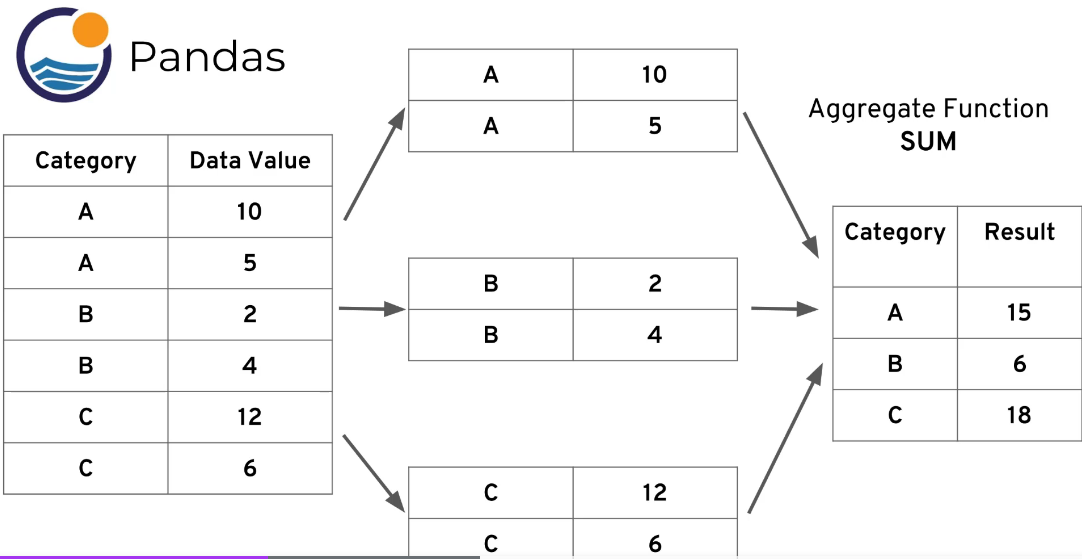

In [85]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [87]:
df.groupby('Company')

In [86]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [89]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


- 여기서 Company는 인덱스, Sales은 컬럼임

In [90]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [91]:
df.groupby('Company').describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

# (18) 4강-7. 일반연산(Operation)

- 시리즈와 데이터프레임의 메소드와 속성
- 고유값 가져오기, 함수 적용하기, 영구적으로 열을 삭제하기
- 열과 인덱스 이름 관련 정보
- 데이터프레임 정렬

In [92]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


#### 고유값

In [93]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [96]:
df['col2'].nunique()

3

In [97]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [99]:
# col1 > 2 
# col2 == 444
newdf = df[(df['col1']>2) & (df['col2']==444)]
newdf

,col1,col2,col3
3,4,444,xyz


#### 사용자 정의 함수 만들고 적용하기 (apply)

In [101]:
# 정규 함수 만들기

def times_two(number):
    return number*2

times_two(4)

8

In [105]:
df['new'] = df['col1'].apply(times_two)
df

,col1,col2,col3,new
0,1,444,abc,2
1,2,555,def,4
2,3,666,ghi,6
3,4,444,xyz,8


In [106]:
del df['new']

In [107]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [108]:
df.drop('col3', axis=1)

,col1,col2
0,1,444
1,2,555
2,3,666
3,4,444


In [109]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [110]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    4 non-null      int64 
 1   col2    4 non-null      int64 
 2   col3    4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [113]:
df.describe()

,col1,col2
count,4.000000,4.000000
mean,2.500000,527.250000
std,1.290994,106.274409
min,1.000000,444.000000
25%,1.750000,444.000000
50%,2.500000,499.500000
75%,3.250000,582.750000
max,4.000000,666.000000


#### 데이터프레임 정렬

In [116]:
df.sort_values(by='col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [117]:
df.sort_values('col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [118]:
df.sort_values('col2', ascending=False)

,col1,col2,col3
2,3,666,ghi
1,2,555,def
0,1,444,abc
3,4,444,xyz


# (18) 4강-8. 데이터 입력과 출력(I/O)

- 판다스로 데이터 입력 & 출력하기
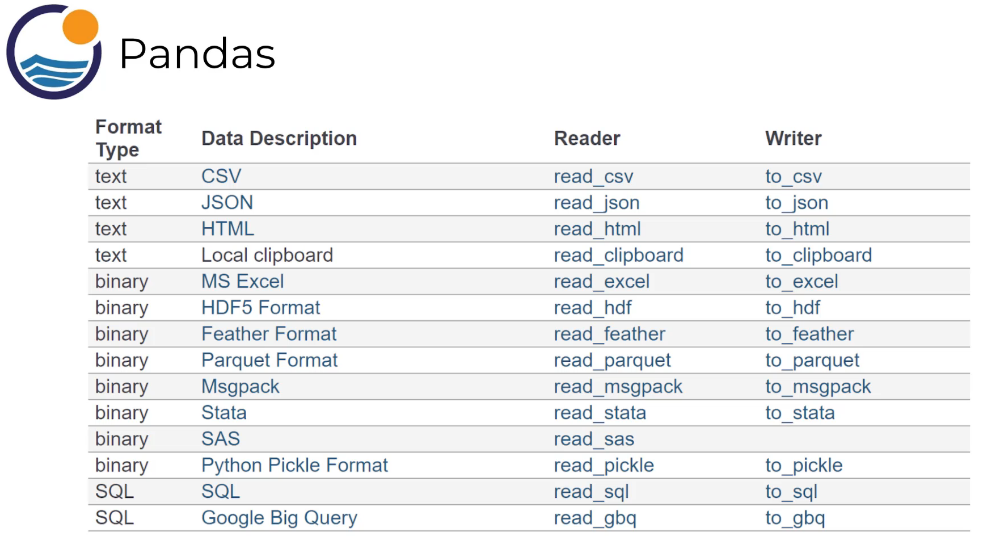

#### 현재 위치 알기

In [121]:
pwd

'C:\\Users\\PC\\Desktop\\Coding_Test\\Udemy\\Udemy_Pandas'

In [119]:
import os

In [120]:
os.listdir()

['.ipynb_checkpoints',
 '00-Intro-to-Pandas.ipynb',
 '01-Series.ipynb',
 '02-DataFrames.ipynb',
 '03-Missing-Data.ipynb',
 '04-Groupby.ipynb',
 '05-Operations.ipynb',
 '06-Data-Input-and-Output.ipynb',
 '07-Pandas-Exercises.ipynb',
 '08-Pandas-Exercises-Solutions.ipynb',
 'example.csv',
 'Excel_Sample.xlsx',
 'Udemy_Pandas(00-08).ipynb']

#### csv 읽기

In [122]:
pd.read_csv('example.csv')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [123]:
pd.read_csv('C:\\Users\\PC\\Desktop\\Coding_Test\\Udemy\\Udemy_Pandas\\example.csv')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [124]:
df = pd.read_csv('example.csv')
new_df = df[['a','b']]
new_df

,a,b
0,0,1
1,4,5
2,8,9
3,12,13


- 데이터프레임 저장
: new_df.to_csv('newdf.csv', index=False)

#### excel 읽기

In [125]:
pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [126]:
df = pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [128]:
df.drop('Unnamed: 0', axis=1)

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


#### html 로 읽기

In [130]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')
df

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1091)>

-> 방화벽으로 읽지 못함